In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller, acf, pacf
import statsmodels.api as sm                               # used for in LJung-Box Test

In [111]:
reviews = pd.read_csv('reviews_final.csv')
print(reviews.shape)
reviews

(146864, 14)


,Unnamed: 0,UserId,ProductId,helpful,OGText,Score,Summary,ReviewDate,Category,ProText,Helpfull,Not Helpfull,Polarity,Sentiment
0,0,A4IL0CLL27Q33,104800001X,"[0, 1]","I hate it when my shirt collars, not otherwise...",5,Perfect for collar stay management,2014-01-29,Tools,hate shirt collar otherwise secured place butt...,0,1,-0.200000,Negative
1,1,A3Q5W5E7TDVLJF,104800001X,"[0, 0]",These little magnets are really powerful for t...,5,Neat,2013-05-31,Tools,little magnet really powerful size using make ...,0,0,-0.095833,Negative
2,2,A37KNOJXE2FU6,104800001X,"[0, 0]",I wanted something this small to mount on the ...,5,Very small and thin,2013-03-13,Tools,wanted something small mount back filagree woo...,0,0,0.083333,Positive
3,3,A3U4AFML9SZPWK,104800001X,"[0, 0]",I use these to magnetize my Warhammer 40K mini...,5,Excellent hobby magnets,2013-06-16,Tools,use magnetize warhammer k miniature together a...,0,0,0.287500,Positive
4,4,A36Y7X194VWVKA,104800001X,"[23, 25]",They are soo freaking annoying!! Why?! You sp...,5,They're annoying... which is why they get five...,2013-08-09,Tools,soo freaking annoying spend time dan near brea...,23,25,-0.077778,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146859,13267,AT53ZTTO707MB,B00KS0F4FI,"[1, 2]",Simple. Perfect. Plenty big enough. Durable...,5,Great pair of claws,2014-06-27,Garden,simple perfect plenty big enough durable tough...,1,2,0.286111,Positive
146860,13268,AYB4ELCS5AM8P,B00KS0F4FI,"[0, 0]",These claws are fantastic. They are made of ha...,5,Sharp...,2014-07-12,Garden,claw fantastic made hard sturdy plastic whethe...,0,0,0.206481,Positive
146861,13269,AZMY6E8B52L2T,B00KS0F4FI,"[1, 3]",I really like theseOuddy Heat Resistant Meat C...,5,Really Helpful...,2014-07-12,Garden,really like theseouddy heat resistant meat cla...,1,3,0.275926,Positive
146862,13270,AEC90GPFKLAAW,B00KS0F4FI,"[0, 0]",I make pulled pork in the crock pot pretty oft...,5,Shreds meat perfectly!,2014-07-16,Garden,make pulled pork crock pot pretty often always...,0,0,0.036369,Positive


In [112]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146864 entries, 0 to 146863
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    146864 non-null  int64  
 1   UserId        146864 non-null  object 
 2   ProductId     146864 non-null  object 
 3   helpful       146864 non-null  object 
 4   OGText        146787 non-null  object 
 5   Score         146864 non-null  int64  
 6   Summary       146864 non-null  object 
 7   ReviewDate    146864 non-null  object 
 8   Category      146864 non-null  object 
 9   ProText       146787 non-null  object 
 10  Helpfull      146864 non-null  int64  
 11  Not Helpfull  146864 non-null  int64  
 12  Polarity      146864 non-null  float64
 13  Sentiment     146864 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 15.7+ MB


In [113]:
reviews1 = reviews[(reviews.ProductId=='104800001X')]
reviews1.shape

(6, 14)

In [49]:
reviews2 = reviews[(reviews.ProductId=='B001LJKLT4')]
reviews2.shape

(170, 14)

In [50]:
reviews = reviews2

In [51]:
reviews = reviews[['ReviewDate','Sentiment']]

In [52]:
reviews.head()

,ReviewDate,Sentiment
74133,2014-04-22,Positive
74134,2010-09-11,Positive
74135,2009-11-03,Positive
74136,2013-05-28,Positive
74137,2013-03-09,Positive


In [53]:
# Converting date into date-time format

reviews['ReviewDate'] = pd.to_datetime(reviews['ReviewDate'])

C:\Users\Nitesh\AppData\Local\Temp\ipykernel_2732\2019893197.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['ReviewDate'] = pd.to_datetime(reviews['ReviewDate'])


In [54]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 74133 to 74302
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ReviewDate  170 non-null    datetime64[ns]
 1   Sentiment   170 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 4.0+ KB


In [55]:
# Converting Sentiment column into Label Encoder

sentiment_encoder = preprocessing.LabelEncoder()
sentiment_encoder.fit(reviews.Sentiment)
print('Showing the Sentiment values : ',sentiment_encoder.classes_)

reviews['Sentiment'] = sentiment_encoder.transform(reviews['Sentiment'])
print('\nAfter converting Sentiment to numeric column : \n',reviews['Sentiment'])

Showing the Sentiment values :  ['Negative' 'Neutral' 'Positive']

After converting Sentiment to numeric column : 
 74133    2
74134    2
74135    2
74136    2
74137    2
        ..
74298    2
74299    2
74300    1
74301    2
74302    2
Name: Sentiment, Length: 170, dtype: int32


C:\Users\Nitesh\AppData\Local\Temp\ipykernel_2732\4257713868.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['Sentiment'] = sentiment_encoder.transform(reviews['Sentiment'])


In [56]:
reviews = reviews.set_index(['ReviewDate'])
reviews.head()

,Sentiment
ReviewDate,
2014-04-22,2
2010-09-11,2
2009-11-03,2
2013-05-28,2
2013-03-09,2


In [57]:
reviews_1 = reviews['Sentiment'].unique()
reviews_1

array([2, 0, 1])

In [58]:
reviews = reviews.squeeze()
type(reviews)

pandas.core.series.Series

In [59]:
# Resampling into Months 

reviews = reviews.resample('M').sum()

In [60]:
reviews

ReviewDate
2009-03-31     2
2009-04-30     2
2009-05-31     0
2009-06-30     0
2009-07-31     0
              ..
2014-03-31     6
2014-04-30    10
2014-05-31     8
2014-06-30     4
2014-07-31     7
Freq: M, Name: Sentiment, Length: 65, dtype: int32

In [61]:
# Splitting the data into train and test

ss = int(0.7 * len(reviews))

train = reviews.iloc[:ss]
test = reviews.iloc[ss:]

print('Train : ',len(train), '\t Test : ',len(test))

Train :  45 	 Test :  20


In [62]:
train.head()

ReviewDate
2009-03-31    2
2009-04-30    2
2009-05-31    0
2009-06-30    0
2009-07-31    0
Freq: M, Name: Sentiment, dtype: int32

In [63]:
test.head()

ReviewDate
2012-12-31     4
2013-01-31    20
2013-02-28    14
2013-03-31    24
2013-04-30     8
Freq: M, Name: Sentiment, dtype: int32

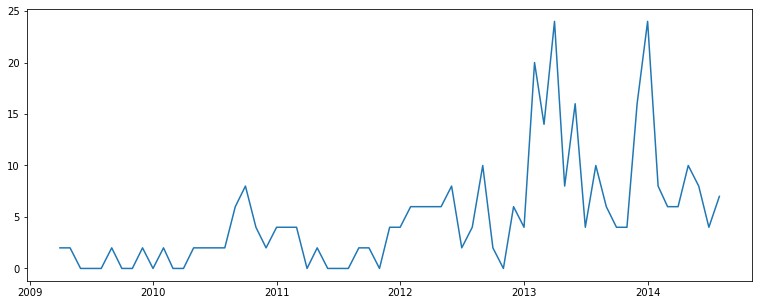

In [64]:
plt.figure(figsize=(13,5))
plt.plot(reviews)
plt.show()

In [65]:
# # visual inspection of data

# decomposition = seasonal_decompose(np.asarray(train), freq=5)

# d_trend=decomposition.trend
# d_seasonal=decomposition.seasonal
# d_residual=decomposition.resid

# fig,ax = plt.subplots(4,1,figsize=(20,12))

# plt.subplot(411)

# plt.title('Decomposition Components', fontsize=13)
# # plt.plot(df1,label='Sales Data')
# reviews.plot(label='Sentiment Data')
# plt.legend(loc='best')

# plt.subplot(412)
# plt.plot(d_trend,label='Trend')
# plt.legend(loc='best')

# plt.subplot(413)
# plt.plot(d_seasonal,label='Seasonal')
# plt.legend(loc='best')

# plt.subplot(414)
# plt.plot(d_residual,label='Residual')
# plt.legend(loc='best')

# plt.tight_layout()

# plt.show()

In [66]:
# checking stationarity

def stationaritycheck(data):
    pvalue = adfuller(data)[1]
    if (pvalue < 0.05):
        print('P-value =',pvalue,'. Data is stationary now proceed for model building')
    else:
        print('P-value =',pvalue,'. Data is not stationary now make data stationarity then proceed for model building')

In [67]:
print(stationaritycheck(train))

P-value = 0.42982691814799395 . Data is not stationary now make data stationarity then proceed for model building
None


In [68]:
# Make the data stationary for train

diff_train = train - train.shift()
diff_train

ReviewDate
2009-03-31    NaN
2009-04-30    0.0
2009-05-31   -2.0
2009-06-30    0.0
2009-07-31    0.0
2009-08-31    2.0
2009-09-30   -2.0
2009-10-31    0.0
2009-11-30    2.0
2009-12-31   -2.0
2010-01-31    2.0
2010-02-28   -2.0
2010-03-31    0.0
2010-04-30    2.0
2010-05-31    0.0
2010-06-30    0.0
2010-07-31    0.0
2010-08-31    4.0
2010-09-30    2.0
2010-10-31   -4.0
2010-11-30   -2.0
2010-12-31    2.0
2011-01-31    0.0
2011-02-28    0.0
2011-03-31   -4.0
2011-04-30    2.0
2011-05-31   -2.0
2011-06-30    0.0
2011-07-31    0.0
2011-08-31    2.0
2011-09-30    0.0
2011-10-31   -2.0
2011-11-30    4.0
2011-12-31    0.0
2012-01-31    2.0
2012-02-29    0.0
2012-03-31    0.0
2012-04-30    0.0
2012-05-31    2.0
2012-06-30   -6.0
2012-07-31    2.0
2012-08-31    6.0
2012-09-30   -8.0
2012-10-31   -2.0
2012-11-30    6.0
Freq: M, Name: Sentiment, dtype: float64

In [69]:
# removing null values

print('Before removing numm values : ',len(diff_train))
diff_train.dropna(inplace=True)
print('After removing null value : ',len(diff_train))
diff_train

Before removing numm values :  45
After removing null value :  44


ReviewDate
2009-04-30    0.0
2009-05-31   -2.0
2009-06-30    0.0
2009-07-31    0.0
2009-08-31    2.0
2009-09-30   -2.0
2009-10-31    0.0
2009-11-30    2.0
2009-12-31   -2.0
2010-01-31    2.0
2010-02-28   -2.0
2010-03-31    0.0
2010-04-30    2.0
2010-05-31    0.0
2010-06-30    0.0
2010-07-31    0.0
2010-08-31    4.0
2010-09-30    2.0
2010-10-31   -4.0
2010-11-30   -2.0
2010-12-31    2.0
2011-01-31    0.0
2011-02-28    0.0
2011-03-31   -4.0
2011-04-30    2.0
2011-05-31   -2.0
2011-06-30    0.0
2011-07-31    0.0
2011-08-31    2.0
2011-09-30    0.0
2011-10-31   -2.0
2011-11-30    4.0
2011-12-31    0.0
2012-01-31    2.0
2012-02-29    0.0
2012-03-31    0.0
2012-04-30    0.0
2012-05-31    2.0
2012-06-30   -6.0
2012-07-31    2.0
2012-08-31    6.0
2012-09-30   -8.0
2012-10-31   -2.0
2012-11-30    6.0
Freq: M, Name: Sentiment, dtype: float64

In [70]:
# Checking Stationarity again after differencing and null value drop

print(stationaritycheck(diff_train))

P-value = 1.1992279800323983e-15 . Data is stationary now proceed for model building
None


In [71]:
# Make the data stationary for test

diff_test = test - test.shift()
diff_test

ReviewDate
2012-12-31     NaN
2013-01-31    16.0
2013-02-28    -6.0
2013-03-31    10.0
2013-04-30   -16.0
2013-05-31     8.0
2013-06-30   -12.0
2013-07-31     6.0
2013-08-31    -4.0
2013-09-30    -2.0
2013-10-31     0.0
2013-11-30    12.0
2013-12-31     8.0
2014-01-31   -16.0
2014-02-28    -2.0
2014-03-31     0.0
2014-04-30     4.0
2014-05-31    -2.0
2014-06-30    -4.0
2014-07-31     3.0
Freq: M, Name: Sentiment, dtype: float64

In [72]:
# removing null values

print('Before removing numm values : ',len(diff_test))
diff_test.dropna(inplace=True)
print('After removing null value : ',len(diff_test))
diff_test

Before removing numm values :  20
After removing null value :  19


ReviewDate
2013-01-31    16.0
2013-02-28    -6.0
2013-03-31    10.0
2013-04-30   -16.0
2013-05-31     8.0
2013-06-30   -12.0
2013-07-31     6.0
2013-08-31    -4.0
2013-09-30    -2.0
2013-10-31     0.0
2013-11-30    12.0
2013-12-31     8.0
2014-01-31   -16.0
2014-02-28    -2.0
2014-03-31     0.0
2014-04-30     4.0
2014-05-31    -2.0
2014-06-30    -4.0
2014-07-31     3.0
Freq: M, Name: Sentiment, dtype: float64

In [73]:
# Checking Stationarity again after differencing and null value drop

print(stationaritycheck(diff_test))

P-value = 0.13415467124997965 . Data is not stationary now make data stationarity then proceed for model building
None


In [74]:
# Make the data stationary for test

diff_test = diff_test - diff_test.shift()
diff_test

ReviewDate
2013-01-31     NaN
2013-02-28   -22.0
2013-03-31    16.0
2013-04-30   -26.0
2013-05-31    24.0
2013-06-30   -20.0
2013-07-31    18.0
2013-08-31   -10.0
2013-09-30     2.0
2013-10-31     2.0
2013-11-30    12.0
2013-12-31    -4.0
2014-01-31   -24.0
2014-02-28    14.0
2014-03-31     2.0
2014-04-30     4.0
2014-05-31    -6.0
2014-06-30    -2.0
2014-07-31     7.0
Freq: M, Name: Sentiment, dtype: float64

In [75]:
# removing null values

print('Before removing numm values : ',len(diff_test))
diff_test.dropna(inplace=True)
print('After removing null value : ',len(diff_test))
diff_test

Before removing numm values :  19
After removing null value :  18


ReviewDate
2013-02-28   -22.0
2013-03-31    16.0
2013-04-30   -26.0
2013-05-31    24.0
2013-06-30   -20.0
2013-07-31    18.0
2013-08-31   -10.0
2013-09-30     2.0
2013-10-31     2.0
2013-11-30    12.0
2013-12-31    -4.0
2014-01-31   -24.0
2014-02-28    14.0
2014-03-31     2.0
2014-04-30     4.0
2014-05-31    -6.0
2014-06-30    -2.0
2014-07-31     7.0
Freq: M, Name: Sentiment, dtype: float64

In [76]:
# Checking Stationarity again after differencing and null value drop

print(stationaritycheck(diff_test))

P-value = 0.38144436246513064 . Data is not stationary now make data stationarity then proceed for model building
None


C:\Users\Nitesh\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


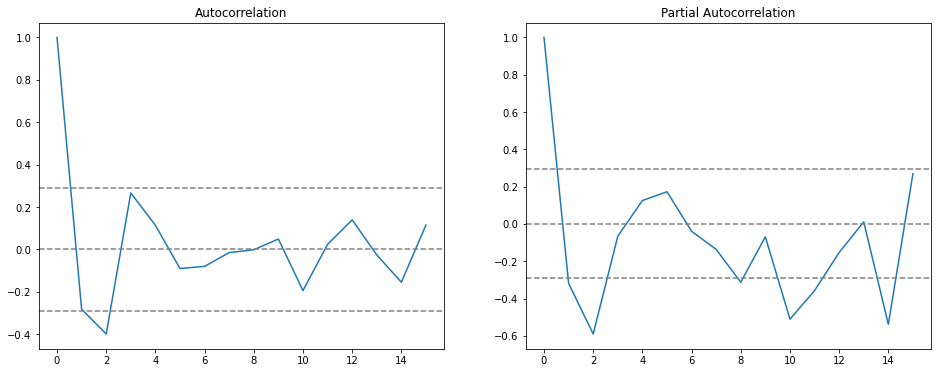

In [77]:
# Plotting ACF and PACF

lag_pcf = acf(diff_train, nlags=15)
lag_pacf = pacf(diff_train, nlags=15, method='ols')

# For ACF

fig, ax = plt.subplots(figsize=(16,6))
plt.subplot(121)
plt.plot(lag_pcf)
plt.title('Autocorrelation')
plt.axhline(y= -1.96/np.sqrt(len(train)), linestyle='--', color='gray')
plt.axhline(y= 0 , linestyle='--', color='gray')
plt.axhline(y= 1.96/np.sqrt(len(train)), linestyle='--', color='gray')

# For PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.title('Partial Autocorrelation')
plt.axhline(y= -1.96/np.sqrt(len(train)), linestyle='--', color='gray')
plt.axhline(y= 0, linestyle='--', color='gray')
plt.axhline(y= 1.96/np.sqrt(len(train)), linestyle='--', color='gray')
plt.show()

In [78]:
model2_1 = ARIMA(diff_train, order=(1,0,2))
results2_1 = model2_1.fit()
model2_2 = ARIMA(diff_train, order=(2,0,2))
results2_2 = model2_2.fit()
model2_3 = ARIMA(diff_train, order=(3,0,1))
results2_3 = model2_3.fit()
model2_4 = ARIMA(diff_train, order=(4,0,2))
results2_4 = model2_4.fit()
model2_5 = ARIMA(diff_train, order=(5,0,2))
results2_5 = model2_5.fit()

C:\Users\Nitesh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [79]:
print("ARIMA(1,0,2)): \t LL = ", results2_1.llf, "\t AIC = ", results2_1.aic)
print("ARIMA(2,0,2):  \t LL = ", results2_2.llf, "\t AIC = ", results2_2.aic)
print("ARIMA(3,0,1):  \t LL = ", results2_3.llf, "\t AIC = ", results2_3.aic)
print("ARIMA(4,0,2):  \t LL = ", results2_4.llf, "\t AIC = ", results2_4.aic)
print("ARIMA(5,0,2):  \t LL = ", results2_5.llf, "\t AIC = ", results2_5.aic)

ARIMA(1,0,2)): 	 LL =  -95.95015018022832 	 AIC =  201.90030036045664
ARIMA(2,0,2):  	 LL =  -94.97217337219618 	 AIC =  201.94434674439236
ARIMA(3,0,1):  	 LL =  -95.50881673374423 	 AIC =  203.01763346748845
ARIMA(4,0,2):  	 LL =  -93.2539507831743 	 AIC =  202.5079015663486
ARIMA(5,0,2):  	 LL =  -94.7415517756337 	 AIC =  207.4831035512674


In [80]:
print('Order - (5,0,2) is giving high liklihood and minimum AIC & BIC')

Order - (5,0,2) is giving high liklihood and minimum AIC & BIC


# Building ARMA model

In [81]:
p=5; q=2

m1 = ARIMA(diff_train, order=(p,0,q)).fit()
print(m1.summary())

                               SARIMAX Results                                
Dep. Variable:              Sentiment   No. Observations:                   44
Model:                 ARIMA(5, 0, 2)   Log Likelihood                 -94.742
Date:                Thu, 09 Jun 2022   AIC                            207.483
Time:                        23:14:22   BIC                            223.541
Sample:                    04-30-2009   HQIC                           213.438
                         - 11-30-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0418      0.207      0.201      0.840      -0.365       0.448
ar.L1         -0.2460      2.111     -0.117      0.907      -4.382       3.891
ar.L2         -0.7328      0.596     -1.230      0.2

In [82]:
strt = len(diff_train)
end = len(diff_train) + len(diff_test) - 1

print('Start : ',strt,'End : ',end)

prediction1 = m1.predict(strt, end)
prediction1

Start :  44 End :  61


2012-12-31   -0.933797
2013-01-31   -3.121441
2013-02-28    0.721415
2013-03-31    1.878666
2013-04-30   -0.252056
2013-05-31   -1.330627
2013-06-30    0.252738
2013-07-31    1.071888
2013-08-31   -0.180451
2013-09-30   -0.687628
2013-10-31    0.245385
2013-11-30    0.544123
2013-12-31   -0.125143
2014-01-31   -0.305754
2014-02-28    0.173934
2014-03-31    0.283527
2014-04-30   -0.062560
2014-05-31   -0.126091
Freq: M, Name: predicted_mean, dtype: float64

In [83]:
prediction1.values

array([-0.93379719, -3.12144085,  0.72141487,  1.87866644, -0.25205593,
       -1.33062684,  0.25273764,  1.07188793, -0.18045103, -0.68762771,
        0.24538462,  0.54412341, -0.12514272, -0.30575421,  0.1739335 ,
        0.28352675, -0.06256046, -0.12609142])

In [84]:
# Performing the LJung-Box test

pvalue = sm.stats.acorr_ljungbox(m1.resid, lags=[1], return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


In [85]:
# Calculating actual, predicted, and error values together

actual=[]; pred=[]

# for i in range(len(prediction1)):
#     actual.append(test[i])
#     pred.append(prediction1[i])

reviews_1 = pd.DataFrame({'Actual':diff_test, 'Predicted':prediction1})
reviews_1['Error'] = reviews_1['Actual'] - reviews_1['Predicted']
reviews_1

,Actual,Predicted,Error
2012-12-31,NaN,-0.933797,NaN
2013-01-31,NaN,-3.121441,NaN
2013-02-28,-22.0,0.721415,-22.721415
2013-03-31,16.0,1.878666,14.121334
2013-04-30,-26.0,-0.252056,-25.747944
2013-05-31,24.0,-1.330627,25.330627
2013-06-30,-20.0,0.252738,-20.252738
2013-07-31,18.0,1.071888,16.928112
2013-08-31,-10.0,-0.180451,-9.819549
2013-09-30,2.0,-0.687628,2.687628


In [86]:
# finding the MSE and RMSE of model

p=5; q=2

print('ARIMA model - Order = (',p,',',q,')')

mse = mean_squared_error(diff_test.values, prediction1.values)

print("\nMSE : ",mse)
print('\nRMSE : ',np.sqrt(mse))

ARIMA model - Order = ( 5 , 2 )

MSE :  221.22757298382356

RMSE :  14.873720885636638


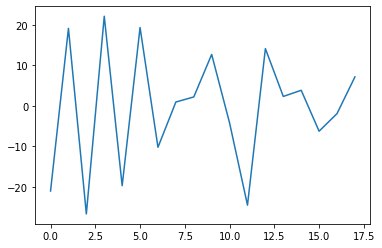

In [87]:
error = diff_test.values - prediction1.values
plt.plot(error)

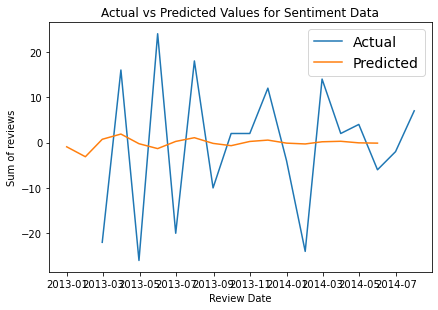

In [88]:
# Plotting the actual and Predicted values

plt.subplots(figsize=(6,4))
plt.plot(diff_test, label='Actual')  
plt.plot(prediction1, label='Predicted')
plt.tight_layout()
plt.legend(fontsize=14)
#plt.xlabel('Days', fontsize=14)
plt.title('Actual vs Predicted Values for Sentiment Data', fontsize=12)
plt.ylabel('Sum of reviews')
plt.xlabel('Review Date')
plt.show()

# Building ARIMA Model

In [89]:
# Splitting the data into train and test

ss = int(0.7 * len(reviews))

train1 = reviews.iloc[:ss]
test1 = reviews.iloc[ss:]

print('Train : ',len(train1), '\t Test : ',len(test1))

Train :  45 	 Test :  20


In [90]:
print("ARIMA(1,0,2)): \t LL = ", results2_1.llf, "\t AIC = ", results2_1.aic)
print("ARIMA(2,0,2):  \t LL = ", results2_2.llf, "\t AIC = ", results2_2.aic)
print("ARIMA(3,0,1):  \t LL = ", results2_3.llf, "\t AIC = ", results2_3.aic)
print("ARIMA(4,0,2):  \t LL = ", results2_4.llf, "\t AIC = ", results2_4.aic)
print("ARIMA(5,0,2):  \t LL = ", results2_5.llf, "\t AIC = ", results2_5.aic)

ARIMA(1,0,2)): 	 LL =  -95.95015018022832 	 AIC =  201.90030036045664
ARIMA(2,0,2):  	 LL =  -94.97217337219618 	 AIC =  201.94434674439236
ARIMA(3,0,1):  	 LL =  -95.50881673374423 	 AIC =  203.01763346748845
ARIMA(4,0,2):  	 LL =  -93.2539507831743 	 AIC =  202.5079015663486
ARIMA(5,0,2):  	 LL =  -94.7415517756337 	 AIC =  207.4831035512674


In [91]:
p=5; q=2; d=1
m2 = ARIMA(reviews, order=(p,d,q)).fit()
m2.summary()   

C:\Users\Nitesh\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Nitesh\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Sentiment   No. Observations:                   65
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -181.414
Date:                Thu, 09 Jun 2022   AIC                            378.827
Time:                        23:14:23   BIC                            396.098
Sample:                    03-31-2009   HQIC                           385.631
                         - 07-31-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8797      0.366      2.401      0.016       0.162       1.598
ar.L2         -0.1707      0.176     -0.967      0.333      -0.517       0.175
ar.L3         -0.3929      0.149     -2.638      0.008      -0.685      -0.101
ar.L4          0.3232      0.303      1.066      0.287      -0.271       0.918
ar.L5         -0.3255      0.187     -1.741      0.082      -0.692       0.041
ma.L1         -1.4308      0.392     -3.650      0.000      -2.199      -0.663
ma.L2          0.6071      0.352      1.724      0.085      -0.083       1.297
sigma2        16.5821      2.338      7.093      0.000      12.000      21.164
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                22.61
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):              11.03   Skew:                             0.69
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [92]:
# Predicting the test data

strt = len(train1)
end = len(train1) + len(test1) - 1

print('Start : ',strt,'End : ',end)

prediction2 = m2.predict(strt, end, typ='levels')
prediction2

Start :  45 End :  64


ReviewDate
2012-12-31     7.369733
2013-01-31     4.964430
2013-02-28    10.457361
2013-03-31    13.425862
2013-04-30    11.955932
2013-05-31    12.477250
2013-06-30     7.250494
2013-07-31    10.339371
2013-08-31     4.269570
2013-09-30    11.283547
2013-10-31     5.555813
2013-11-30     9.562266
2013-12-31    13.940799
2014-01-31    19.160129
2014-02-28    10.570090
2014-03-31     7.470084
2014-04-30    10.636955
2014-05-31     6.548699
2014-06-30     7.655913
2014-07-31     6.013948
Freq: M, Name: predicted_mean, dtype: float64

In [93]:
reviews_2 = pd.DataFrame({'Actual':test, 'Predicted':prediction2})
reviews_2['Error'] = reviews_2['Actual'] - reviews_2['Predicted']
reviews_2

,Actual,Predicted,Error
ReviewDate,,,
2012-12-31,4,7.369733,-3.369733
2013-01-31,20,4.964430,15.035570
2013-02-28,14,10.457361,3.542639
2013-03-31,24,13.425862,10.574138
2013-04-30,8,11.955932,-3.955932
2013-05-31,16,12.477250,3.522750
2013-06-30,4,7.250494,-3.250494
2013-07-31,10,10.339371,-0.339371
2013-08-31,6,4.269570,1.730430


In [94]:
p=4; q=2

print('ARIMA model - Order = (',p,',',q,')')

mse = mean_squared_error(test1, prediction2)

print("\nMSE : ",mse)
print('\nRMSE : ',np.sqrt(mse))

ARIMA model - Order = ( 4 , 2 )

MSE :  38.30342479356594

RMSE :  6.188976069881506


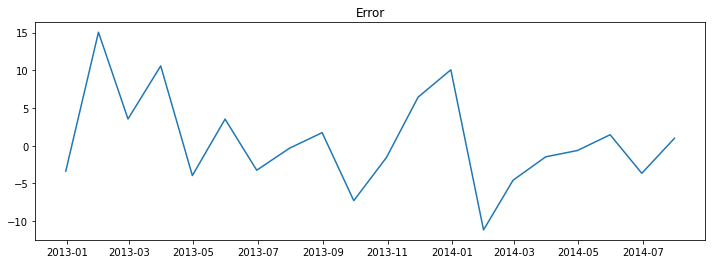

In [95]:
# plotting the errors

plt.subplots(figsize=(12,4))
plt.plot(reviews_2.Error)
plt.title('Error')
plt.show()

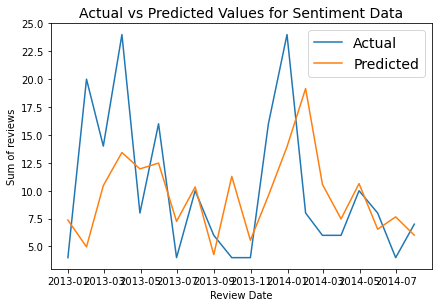

In [96]:
# Plotting the actual and Predicted values

plt.subplots(figsize=(6,4))
plt.plot(reviews_2.Actual, label='Actual')  
plt.plot(reviews_2.Predicted, label='Predicted')
plt.tight_layout()
plt.legend(fontsize=14)
#plt.xlabel('Days', fontsize=14)
plt.title('Actual vs Predicted Values for Sentiment Data', fontsize=14)
plt.ylabel('Sum of reviews')
plt.xlabel('Review Date')
plt.show()

In [97]:
fcast = m2.predict(start=len(reviews), end=len(reviews)+11, typ='levels')
print(fcast)

2014-08-31     8.770135
2014-09-30    10.037301
2014-10-31     9.029248
2014-11-30     9.502070
2014-12-31     9.187783
2015-01-31     9.060054
2015-02-28     8.077310
2015-03-31     7.839005
2015-04-30     7.591860
2015-05-31     7.862313
2015-06-30     7.960036
2015-07-31     8.339808
Freq: M, Name: predicted_mean, dtype: float64


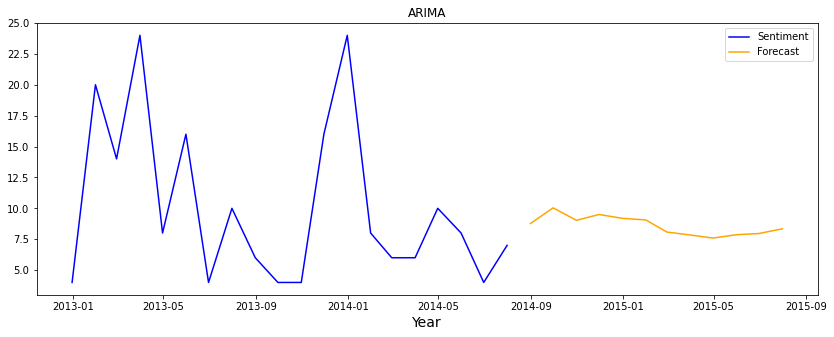

In [98]:
# Forcasting the future values 

plt.subplots(figsize=(14,5))
plt.plot(test1, color='blue', label='Sentiment')
plt.plot(fcast, color='orange', label='Forecast')
plt.legend()
plt.xlabel('Year', fontsize=14)
plt.title('ARIMA')
plt.show()

# Building Sarima model

In [99]:
p=5; q=2; d=1

m3 = sm.tsa.statespace.SARIMAX(train1, order=(p,d,q), seasonal_order=(p,d,q,12)).fit()
m3.summary()

C:\Users\Nitesh\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Nitesh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Sentiment   No. Observations:                   45
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                 -71.977
Date:                            Thu, 09 Jun 2022   AIC                            173.954
Time:                                    23:14:33   BIC                            195.940
Sample:                                03-31-2009   HQIC                           181.242
                                     - 11-30-2012                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6344      2.862      0.222      0.825      -4.975       6.244
ar.L2         -0.5455      0.924     -0.590      0.555      -2.357       1.266
ar.L3          0.5858      1.113      0.526      0.599      -1.596       2.767
ar.L4         -0.6581      3.778     -0.174      0.862      -8.062       6.746
ar.L5          0.1079      0.972      0.111      0.912      -1.797       2.012
ma.L1         -1.3057      1.307     -0.999      0.318      -3.867       1.255
ma.L2          0.9873      4.252      0.232      0.816      -7.347       9.321
ar.S.L12      -0.0558    909.675  -6.13e-05      1.000   -1782.985    1782.874
ar.S.L24       0.4874   1378.066      0.000      1.000   -2700.473    2701.447
ar.S.L36       0.3650    842.391      0.000      1.000   -1650.691    1651.421
ar.S.L48      -0.5064    139.800     -0.004      0.997    -274.509     273.496
ar.S.L60       0.2124    621.589      0.000      1.000   -1218.079    1218.504
ma.S.L12       0.0296    954.630    3.1e-05      1.000   -1871.010    1871.069
ma.S.L24      -0.6994   3135.086     -0.000      1.000   -6145.355    6143.956
sigma2         0.7652   1279.896      0.001      1.000   -2507.785    2509.315
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 2.99
Prob(Q):                              0.86   Prob(JB):                         0.22
Heteroskedasticity (H):               1.33   Skew:                            -0.64
Prob(H) (two-sided):                  0.65   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [100]:
# Predicting the test data                                

strt = len(train1)
end = len(train1) + len(test1) - 1

print('Start : ',strt,'End : ',end)

prediction3 = m3.predict(strt, end, typ='levels')             # another wat to do -> prediction5 = m5.predict(33, 48)                        
prediction3

Start :  45 End :  64


2012-12-31   -0.980383
2013-01-31   -0.948182
2013-02-28    3.884182
2013-03-31   -1.930072
2013-04-30   -0.356704
2013-05-31    2.958482
2013-06-30   -0.000396
2013-07-31   -1.169130
2013-08-31    5.233001
2013-09-30    4.898645
2013-10-31   -0.823671
2013-11-30    3.613206
2013-12-31    4.180136
2014-01-31    3.444991
2014-02-28    7.156803
2014-03-31    3.584063
2014-04-30    2.378381
2014-05-31    4.693599
2014-06-30   -0.143242
2014-07-31   -0.285863
Freq: M, Name: predicted_mean, dtype: float64

In [101]:
# Calculating actual, predicted, and error values together

actual=[]; pred=[]

for i in range(len(prediction3)):
    actual.append(test1[i])
    pred.append(prediction3[i])

reviews_3 = pd.DataFrame({'Actual':actual, 'Predicted':prediction3})
reviews_3['Error'] = reviews_3['Actual'] - reviews_3['Predicted']
reviews_3

,Actual,Predicted,Error
2012-12-31,4,-0.980383,4.980383
2013-01-31,20,-0.948182,20.948182
2013-02-28,14,3.884182,10.115818
2013-03-31,24,-1.930072,25.930072
2013-04-30,8,-0.356704,8.356704
2013-05-31,16,2.958482,13.041518
2013-06-30,4,-0.000396,4.000396
2013-07-31,10,-1.169130,11.169130
2013-08-31,6,5.233001,0.766999
2013-09-30,4,4.898645,-0.898645


In [102]:
p=5; q=2

print('ARIMA model - Order = (',p,',',q,')')

mse = mean_squared_error(test1, prediction3)

print("\nMSE : ",mse)
print('\nRMSE : ',np.sqrt(mse))

ARIMA model - Order = ( 5 , 2 )

MSE :  117.8557615376177

RMSE :  10.856139347743179


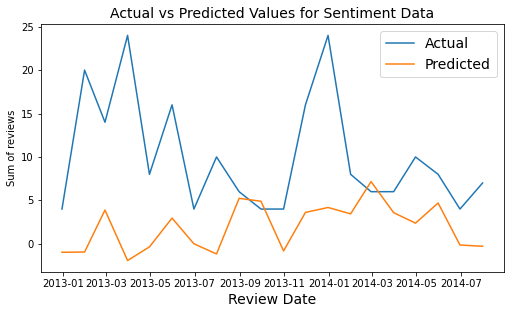

In [103]:
# Plotting the actual and Predicted values

plt.subplots(figsize=(7,4))
plt.plot(reviews_3.Actual, label='Actual')  
plt.plot(reviews_3.Predicted, label='Predicted')
plt.tight_layout()
plt.legend(fontsize=14)
plt.xlabel('Days', fontsize=14)
plt.title('Actual vs Predicted Values for Sentiment Data', fontsize=14)
plt.ylabel('Sum of reviews')
plt.xlabel('Review Date')
plt.show()

In [104]:
fcast = m3.predict(start=len(reviews), end=len(reviews)+11, typ='levels')
print(fcast)

2014-08-31    5.319034
2014-09-30   -1.674211
2014-10-31   -3.592043
2014-11-30    5.192825
2014-12-31   -0.761829
2015-01-31   -0.253727
2015-02-28    3.413442
2015-03-31    1.377862
2015-04-30    1.087519
2015-05-31    5.816540
2015-06-30    1.076780
2015-07-31    0.503281
Freq: M, Name: predicted_mean, dtype: float64


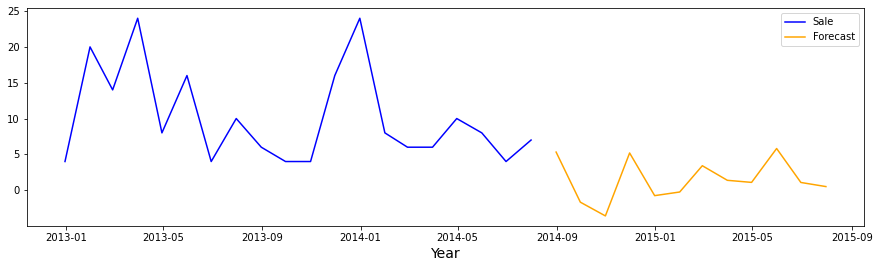

In [105]:
# Forcasting the future values 

plt.subplots(figsize=(15,4))
plt.plot(test1, color='blue', label='Sale')
plt.plot(fcast, color='orange', label='Forecast')
plt.legend()
plt.xlabel('Year', fontsize=14)
plt.show()